In [7]:
#To access youtube comments using youtube API we should Authenticate
import os

SCOPES = ['https://www.googleapis.com/auth/youtube.force-ssl']
API_SERVICE_NAME = 'youtube'
API_VERSION = 'v3'

#Get the youtube API key and download client_secrets.json file

CLIENT_SECRETS_FILE  = os.path.join('/content/drive/My Drive/Colab Notebooks/client_secrets.json')

In [8]:
import google.oauth2.credentials

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow


def get_authenticated_service():
    flow = InstalledAppFlow.from_client_secrets_file(CLIENT_SECRETS_FILE, SCOPES)
    credentials = flow.run_console()
    return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)


os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
service = get_authenticated_service()


#code to cache the login details
import os
import pickle
import google.oauth2.credentials

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

...
...

def get_authenticated_service():
    credentials = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            credentials = pickle.load(token)
    #  Check if the credentials are invalid or do not exist
    if not credentials or not credentials.valid:
        # Check if the credentials have expired
        if credentials and credentials.expired and credentials.refresh_token:
            credentials.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                CLIENT_SECRETS_FILE, SCOPES)
            credentials = flow.run_console()

        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(credentials, token)

    return build(API_SERVICE_NAME, API_VERSION, credentials = credentials)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=782597543999-lchm7ola2u3ubdj9rkqgpu2uvun3vlvq.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=oSBu8diANfGiE69P1mclS36AkAe4bM&prompt=consent&access_type=offline
Enter the authorization code: 4/2AFb6cM2AHURa9aVe0g3Jyk6s92S073dqA0xCXut36dngRWkKsopQ7s


In [9]:
def get_comment_threads(youtube, video_id, comments=[], token=""):
    results = youtube.commentThreads().list(
        part="snippet",
        pageToken=token,
        videoId=video_id,
        textFormat="plainText"
    ).execute()

    for item in results["items"]:
        comment = item["snippet"]["topLevelComment"]
        text = comment["snippet"]["textDisplay"]
        comments.append(text)

    if "nextPageToken" in results:
        return get_comment_threads(youtube, video_id, comments, results["nextPageToken"])
    else:
        return comments

In [10]:
#Python code for getting videoid from url

from urllib.parse import urlparse, parse_qs

def extract_video_id(url):
    # Examples:
    # - http://youtu.be/SA2iWivDJiE
    # - http://www.youtube.com/watch?v=_oPAwA_Udwc&feature=feedu
    # - http://www.youtube.com/embed/SA2iWivDJiE
    # - http://www.youtube.com/v/SA2iWivDJiE?version=3&amp;hl=en_US
    query = urlparse(url)
    if query.hostname == 'youtu.be': return query.path[1:]
    if query.hostname in ('www.youtube.com', 'youtube.com'):
        if query.path == '/watch': return parse_qs(query.query)['v'][0]
        if query.path[:7] == '/embed/': return query.path.split('/')[2]
        if query.path[:3] == '/v/': return query.path.split('/')[2]
    # fail?
    return None

url = input('Enter url of the video : ') # we can directly give videoid
videoid = extract_video_id(url)

Enter url of the video : https://www.youtube.com/watch?v=4KcMdH8qiuk


In [11]:
comments = get_comment_threads(service,videoid) #to get comments of the video, this will take sometime to extract comments


In [20]:
positive_comments = 0
negative_comments = 0
neutral_comments = 0


In [21]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
for i in comments:
  score = sentiment.polarity_scores(i)['compound']
  if score >0.05:
    positive_comments+=1
  elif score > -0.05 and score < 0.05:
    neutral_comments+=1
  else:
    negative_comments+=1


After Analysing 6816 comments :
The result is

Total positive comments : 3948
Total Negative comments : 1145
Total Neutral comments : 1723


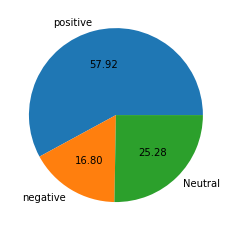

In [22]:
import matplotlib.pyplot as plt

print('After Analysing',len(comments),'comments :')
print('The result is')
print()
print('Total positive comments :',positive_comments)
print('Total Negative comments :',negative_comments)
print('Total Neutral comments :',neutral_comments)

data = [positive_comments,negative_comments,neutral_comments]
labels=['positive','negative','Neutral']
plt.pie(data,labels=labels,autopct='%.2f')
plt.show()